In [3]:
import pandas as pd
file_path=r'C:\Users\kidig\OneDrive\Desktop\nicosia\nicosia_csv.csv'
df=pd.read_csv(file_path)

column_of_interest='value'

data=df[column_of_interest]

summary_statistics = data.describe()
print("Summary statistics for 'co' pollutant:\n", summary_statistics)

Summary statistics for 'co' pollutant:
 count    23466.000000
mean        79.035917
std        153.415962
min         -1.100000
25%          4.200000
50%         17.000000
75%         80.000000
max       2000.000000
Name: value, dtype: float64


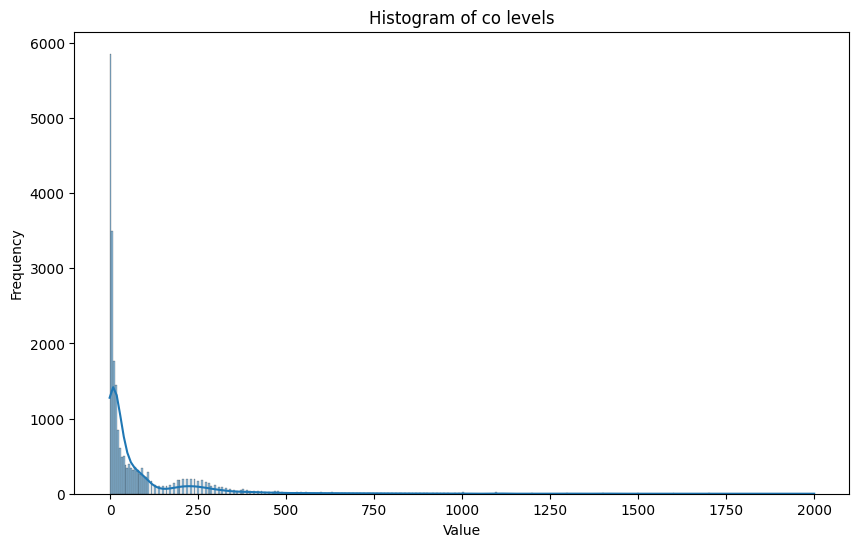

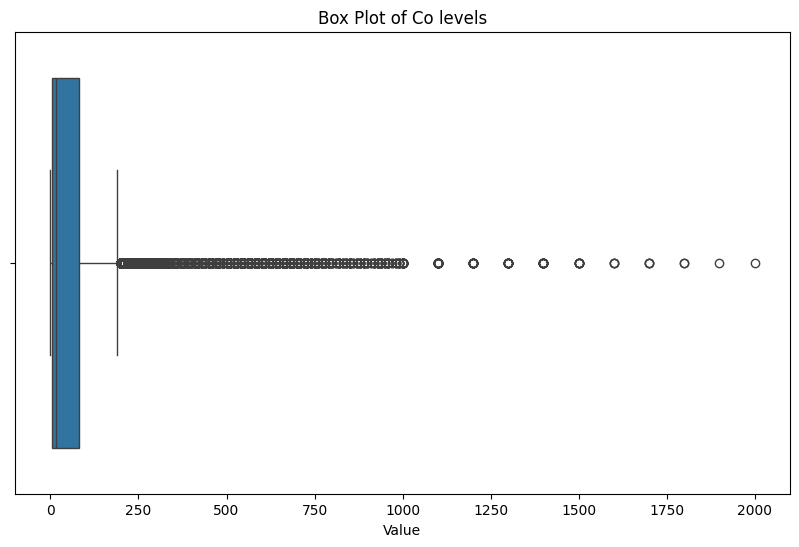

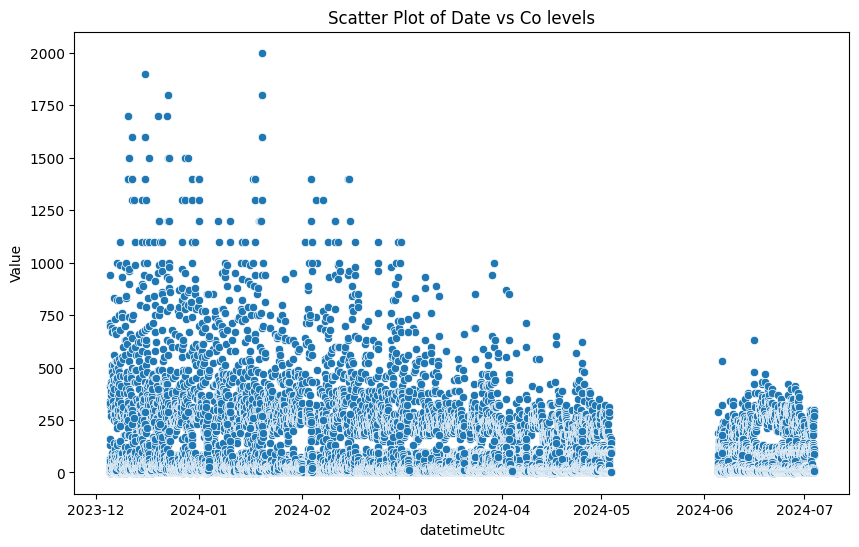

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = r'C:\Users\kidig\OneDrive\Desktop\nicosia\nicosia_csv.csv'
df = pd.read_csv(file_path, parse_dates=['datetimeUtc'])

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['value'], kde=True)
plt.title('Histogram of co levels')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value'])
plt.title('Box Plot of Co levels')
plt.xlabel('Value')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['datetimeUtc'], y=df['value'])
plt.title('Scatter Plot of Date vs Co levels')
plt.xlabel('datetimeUtc')
plt.ylabel('Value')
plt.show()

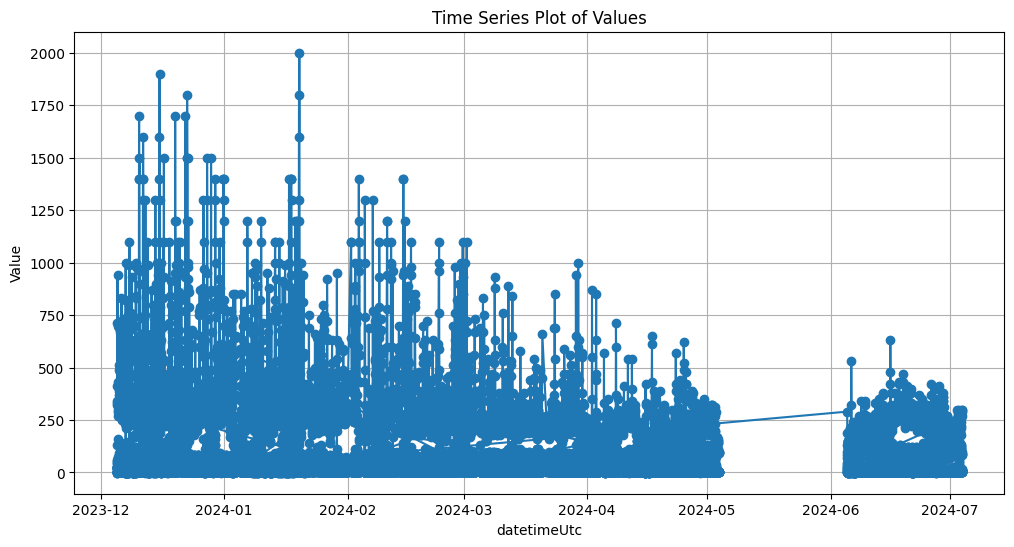

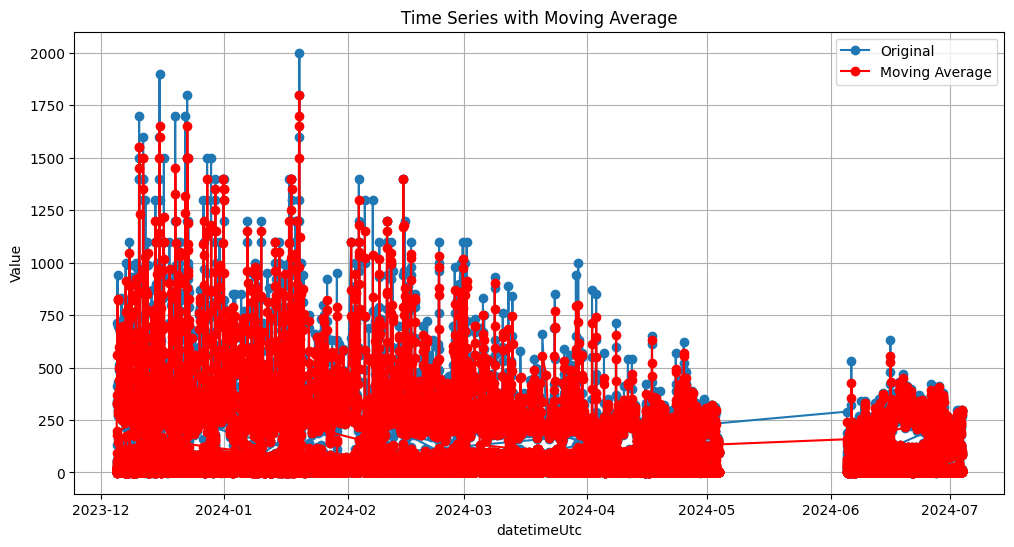

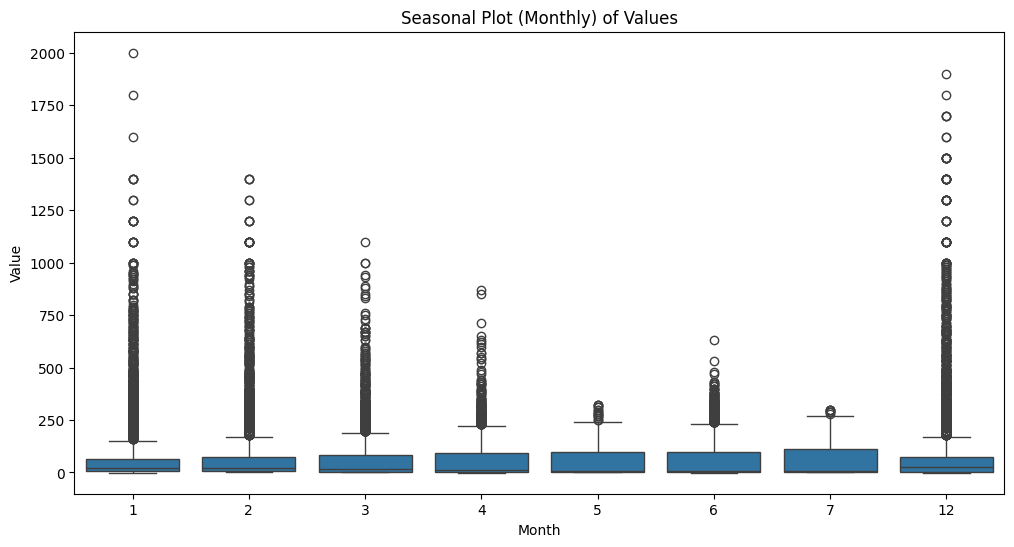

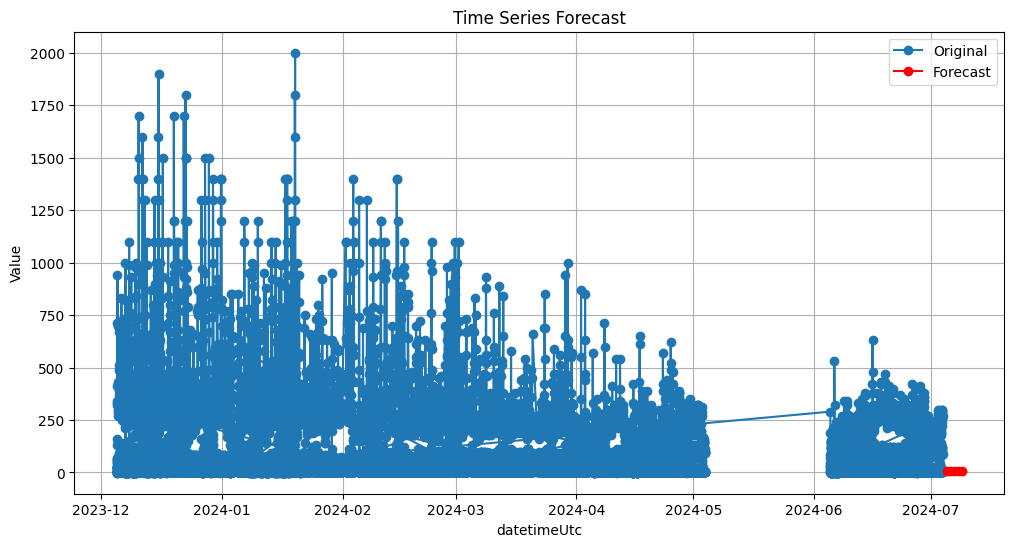

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = r'C:\Users\kidig\OneDrive\Desktop\nicosia\nicosia_csv.csv'
df = pd.read_csv(file_path, parse_dates=['datetimeUtc'], index_col='datetimeUtc')

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-')
plt.title('Time Series Plot of Values')
plt.xlabel('datetimeUtc')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Calculate and plot the moving average
df['moving_avg'] = df['value'].rolling(window=2).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-', label='Original')
plt.plot(df.index, df['moving_avg'], marker='o', color='red', linestyle='-', label='Moving Average')
plt.title('Time Series with Moving Average')
plt.xlabel('datetimeUtc')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal plot (assuming monthly data for seasonal analysis)
df['month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='value', data=df)
plt.title('Seasonal Plot (Monthly) of Values')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

# Simple time series forecasting using the last value
forecast_periods = 5
last_value = df['value'].iloc[-1]
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_values = [last_value] * forecast_periods

forecast_df = pd.DataFrame(forecast_values, index=forecast_dates, columns=['forecast'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-', label='Original')
plt.plot(forecast_df.index, forecast_df['forecast'], marker='o', color='red', linestyle='-', label='Forecast')
plt.title('Time Series Forecast')
plt.xlabel('datetimeUtc')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = r'C:\Users\kidig\OneDrive\Desktop\nicosia\nicosia_csv.csv'
df = pd.read_csv(file_path, parse_dates=['datetimeUtc'], index_col='datetimeUtc')

# Convert datetime index to feature
df['hour'] = df.index.hour
df['day'] = df.index.dayofweek
df['month'] = df.index.month

# Use 'value' column as target
X = df[['hour', 'day', 'month']]
y = df['value']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 8671.4925085034
Coefficients: [10.9150146  -0.45157761 11.24330783]
Intercept: 86.16802190502902


In [7]:
# New data to predict
new_data = pd.DataFrame({
    'hour': [10],
    'day': [3],
    'month': [12]
})

# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make prediction
predicted_value = model.predict(new_data_scaled)
print(f'Predicted CO Level: {predicted_value[0]} µg/m³')

Predicted CO Level: 106.66413816513314 µg/m³
